In [4]:
import pandas as pd
import sqlite3 as ss
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning for bollywood_movies.sqlite

In [5]:
con = ss.connect("movies_data/bollywood_movies.sqlite")
df = pd.read_sql_query("SELECT * from Movies ", con)

### Chekcing info to see for null values and data types

- Null values occuring in Genre(1) , Budget(Crores)(12), Box-Office(Crores)(9)
- Data types seems to be accurate
- Also memory also seems to be reasonable

In [6]:
# Dropping the index column because we already have indexes and its just a watse of space
df = df.drop('index', axis =1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MovieID             55 non-null     object 
 1   Title               55 non-null     object 
 2   Director            55 non-null     object 
 3   Genre               54 non-null     object 
 4   ReleaseYear         55 non-null     int64  
 5   Budget (Crores)     43 non-null     float64
 6   BoxOffice (Crores)  46 non-null     float64
 7   Rating              55 non-null     float64
 8   Duration (minutes)  55 non-null     int64  
 9   LeadActor           55 non-null     object 
 10  LeadActress         55 non-null     object 
 11  Language            55 non-null     object 
 12  ProductionCompany   55 non-null     object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.7+ KB


In [8]:
df['Genre'] = df['Genre'].fillna('Genre Unknown') 

<Axes: ylabel='Density'>

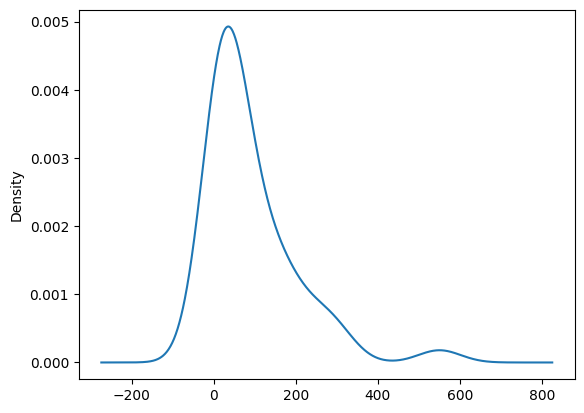

In [9]:
# Using kde plotting to better understand data and determine how to fill the null values
df['Budget (Crores)'].plot.kde()

In [10]:
df['Budget (Crores)'].median()

np.float64(50.0)

In [11]:
# Considering median to be a better value to be filled
df['Budget (Crores)'] = df['Budget (Crores)'].fillna(df['Budget (Crores)'].median())

In [12]:
df['BoxOffice (Crores)'].median()

np.float64(250.0)

In [13]:
# Considering median to be a better value to be filled
df['BoxOffice (Crores)'] = df['BoxOffice (Crores)'].fillna(df['BoxOffice (Crores)'].median())

In [14]:
# To remove duplicates
df = df.drop_duplicates(subset=['Title', 'ReleaseYear', 'Director'])

In [15]:
# downloading cleaned file
df.to_csv("cleaned_bollywood_movies.csv", index=False)

# Cleaning for indian_movies.csv

In [16]:
df2 = pd.read_csv('movies_data/indian_movies.csv')

### Chekcing info to see for null values and data types

- Null values occuring in releaseyear(1) , Budget(Crores)(8), Box-Office(Crores)(8), Rating(1), Duration (minutes)(1)
- Data types seems to be inaccurate in some cases
- Also memory also seems to be reasonable

In [17]:
# dropping unnamed column because the indexes are wrong and also we already have indexes
df2 = df2.drop('Unnamed: 0', axis =1)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MovieID             18 non-null     object 
 1   Title               18 non-null     object 
 2   Director            18 non-null     object 
 3   Genre               18 non-null     object 
 4   ReleaseYear         17 non-null     float64
 5   Budget (Crores)     10 non-null     float64
 6   BoxOffice (Crores)  10 non-null     float64
 7   Rating              17 non-null     float64
 8   Duration (minutes)  17 non-null     float64
 9   LeadActor           18 non-null     object 
 10  LeadActress         18 non-null     object 
 11  Language            18 non-null     object 
 12  ProductionCompany   18 non-null     object 
dtypes: float64(5), object(8)
memory usage: 2.0+ KB


In [19]:
df2[df2['ReleaseYear'].isna()]

,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
17,MOV049,U Turn,Pawan Kumar,Thriller,NaN,5.0,20.0,7.9,128.0,Shraddha Srinath,Dilip Raj,Kannada,PRK Productions


#### since from the data we can assume that mostly same years are continuing 
#### I am going to copy the row from above and paste for the missing value

In [20]:
df2['ReleaseYear'] = df2['ReleaseYear'].fillna(method='ffill')

/tmp/ipykernel_8302/1195842932.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['ReleaseYear'] = df2['ReleaseYear'].fillna(method='ffill')


In [21]:
# Considering median to be a better value to be filled
df2['Budget (Crores)'] = df2['Budget (Crores)'].fillna(df2['Budget (Crores)'].median())

In [22]:
# Considering median to be a better value to be filled
df2['BoxOffice (Crores)'] = df2['BoxOffice (Crores)'].fillna(df2['BoxOffice (Crores)'].median())

In [23]:
# Considering mean for filling null values of Rating
df2['Rating'] = df2['Rating'].fillna(df2['Rating'].mean())

In [24]:
df2['Duration (minutes)']

0     173.0
1     147.0
2     156.0
3     181.0
4       NaN
5     164.0
6     145.0
7     170.0
8     118.0
9     158.0
10    159.0
11    164.0
12    141.0
13    129.0
14    162.0
15    156.0
16    144.0
17    128.0
Name: Duration (minutes), dtype: float64

In [25]:
df2['Duration (minutes)'] = df2['Duration (minutes)'].fillna(df2['Duration (minutes)'].mean())

In [26]:
# I also have to convert ReleaseYear and Duration type to int
cols = ['ReleaseYear', 'Duration (minutes)']
df2[cols] = df2[cols].astype(int)

In [27]:
# To remove duplicates
df2 = df2.drop_duplicates(subset=['Title', 'ReleaseYear', 'Director'])

In [28]:
# downloading cleaned file
df2.to_csv("cleaned_indian_movies.csv", index=False)

# Cleaning for tollywood_movies.xlsx

### Chekcing info to see for null values and data types

- Null values occuring in releaseyear(2), Rating(1), Duration (minutes)(1), Language(3), Production)Company(1)
- Data types seems to be inaccurate in some cases
- Also memory also seems to be reasonable

In [29]:
df3 = pd.read_excel('movies_data/tollywood_movies.xlsx')

In [30]:
# dropping unnamed column because the indexes are wrong and also we already have indexes
df3 = df3.drop('Unnamed: 0', axis =1)

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MovieID             10 non-null     object 
 1   Title               10 non-null     object 
 2   Director            10 non-null     object 
 3   Genre               10 non-null     object 
 4   ReleaseYear         8 non-null      float64
 5   Budget (Crores)     10 non-null     int64  
 6   BoxOffice (Crores)  10 non-null     int64  
 7   Rating              9 non-null      float64
 8   Duration (minutes)  9 non-null      float64
 9   LeadActor           10 non-null     object 
 10  LeadActress         10 non-null     object 
 11  Language            7 non-null      object 
 12  ProductionCompany   9 non-null      object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ KB


In [32]:
df3['Language'].unique()

array(['Telugu', nan], dtype=object)

#### Since all values in language column will be same that is telugu we can just delete that column(Don't need to fill null values)
- This can help with decreasing memory

In [33]:
# axis = 1 shows that i am deleting a column
df3 = df3.drop('Language' , axis =1)

In [34]:
df3['ReleaseYear']

0       NaN
1    2015.0
2    2019.0
3    2019.0
4    2018.0
5    2019.0
6       NaN
7    2020.0
8    2015.0
9    2017.0
Name: ReleaseYear, dtype: float64

In [35]:
df3[df3['ReleaseYear'].isna()]

,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,ProductionCompany
0,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,NaN,250,1810,8.2,171.0,Prabhas,Anushka Shetty,Arka Media Works
6,MOV034,Sarileru Neekevvaru,Anil Ravipudi,Action Comedy,NaN,75,260,7.1,169.0,Mahesh Babu,Rashmika Mandanna,AK Entertainments


In [36]:
# Filling the respective rows with accurate release year
df3.loc[0, 'ReleaseYear'] = 2017
df3.loc[6, 'ReleaseYear'] = 2020

In [37]:
# Considering mean for filling null values of Rating
df3['Rating'] = df3['Rating'].fillna(df3['Rating'].mean())

In [38]:
# Dilled with mean
df3['Duration (minutes)'] = df3['Duration (minutes)'].fillna(df3['Duration (minutes)'].mean())

In [39]:
df3['ProductionCompany']

0               Arka Media Works
1                            NaN
2    Konidela Production Company
3         Sithara Entertainments
4                   GA2 Pictures
5            Mythri Movie Makers
6              AK Entertainments
7         Sithara Entertainments
8               Arka Media Works
9               Arka Media Works
Name: ProductionCompany, dtype: object

In [40]:
# filled with specific values that i found out for bahubali the beginning
df3.loc[1 , 'ProductionCompany'] = 'Arka Media Works'

In [41]:
# i have to convert ['Release Year' and 'Duration'] to int
# 'budget', boxoffice' to foat
df3[cols] = df3[cols].astype(int)
cols2 = ['Budget (Crores)','BoxOffice (Crores)'] 
df3[cols2] = df3[cols2].astype(float) 

In [42]:
# To remove duplicates
df3 = df3.drop_duplicates(subset=['LeadActor', 'ReleaseYear', 'Director'])

In [43]:
# downloading cleaned file
df3.to_csv("cleaned_tollywood_movies.csv", index=False)